<a href="https://colab.research.google.com/github/icarusrodrigues/queue-simulations/blob/main/MMC_Queue_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **M/M/C Queue**

An M/M/C queue is a queuing model used in Queuing Theory to analyze the behavior of queuing systems with multiple servers (C servers) and customer arrival following a Poisson process (M) and exponential service times (M).

Below we have the implementation of the MMC Queue class:

In [2]:
!pip install simpy

In [3]:
import numpy as np
import simpy as sp
import matplotlib.pyplot as plt
import random as rd

In [4]:
class MMCQueue:

  def __init__(self, arrival_rate, service_rate, max_resources, horizon, show=False):
    self.env = sp.Environment()
    self.n = 0
    self.arrival_rate = arrival_rate
    self.service_rate = service_rate
    self.max_resources = max_resources
    self.horizon = horizon
    self.show = show
    self.times_queue = []
    self.people_queue = []
    self.i = 0

  def arrive(self):
    while True:
      self.i += 1
      yield self.env.timeout(np.random.exponential(1/self.arrival_rate))

      self.n += 1
      self.times_queue.append(self.env.now)
      self.people_queue.append(self.n)

      if self.show:
        print(f"Someone arrived!\n- n = {self.n}, t = {self.env.now})\n")

      if self.n == 1:
        self.env.process(self.service())

  def service(self):
    while self.n > 0:
      self.i += 1

      yield self.env.timeout(np.random.exponential(1/self.service_rate))

      if self.n - self.max_resources >= 0:
        self.n -= self.max_resources

      else:
        self.n = 0

      self.times_queue.append(self.env.now)
      self.people_queue.append(self.n)

      if self.show:
        print(f"Someone was attended to!\n- n = {self.n}, t = {self.env.now})\n")

  def run_simulation(self):
    self.env.process(self.arrive())

    if self.n > 0:
      self.env.process(self.service())

    self.env.run(until=self.horizon)

    print("End of simulation!")

Example of simulation using arrival rate of 7 people per minute, service rate of 5 people per minute, in a period (horizon) of 30 minutes in system with 3 servers. It's possible to see the size of the queue when someone arrives or leaves.

In [5]:
arrival_rate = 7
service_rate = 5
max_resources = 3
horizon = 30

mmc_queue = MMCQueue(arrival_rate, service_rate, max_resources, horizon, True)

mmc_queue.run_simulation()

Someone arrived!
- n = 1, t = 0.12092848029725928)

Someone was attended to!
- n = 0, t = 0.16788006296846752)

Someone arrived!
- n = 1, t = 0.3250114876797767)

Someone was attended to!
- n = 0, t = 0.4074780238301353)

Someone arrived!
- n = 1, t = 0.5749363818981684)

Someone arrived!
- n = 2, t = 0.6251783414779315)

Someone arrived!
- n = 3, t = 0.6423793964711759)

Someone was attended to!
- n = 0, t = 0.6467459462801373)

Someone arrived!
- n = 1, t = 0.7481256395739647)

Someone arrived!
- n = 2, t = 0.7941994304206232)

Someone arrived!
- n = 3, t = 0.8427554547701696)

Someone arrived!
- n = 4, t = 0.8793608082802732)

Someone was attended to!
- n = 1, t = 1.0017729907877644)

Someone arrived!
- n = 2, t = 1.0571873445809092)

Someone was attended to!
- n = 0, t = 1.2935316928496376)

Someone arrived!
- n = 1, t = 1.6439011721561398)

Someone arrived!
- n = 2, t = 1.6768777790190206)

Someone arrived!
- n = 3, t = 1.6802905134859043)

Someone arrived!
- n = 4, t = 1.79540763

Below there is a graph showing how the queue behaves over time.

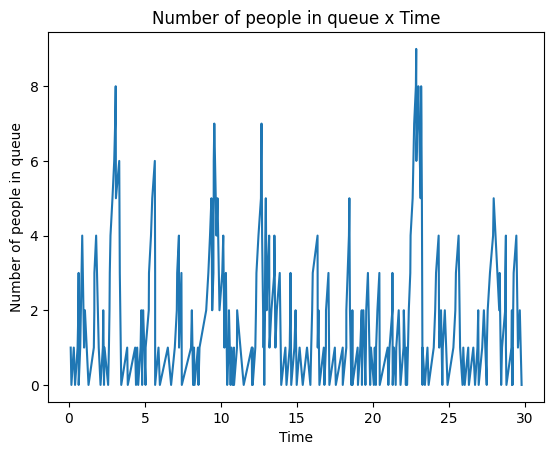

In [7]:
plt.plot(mmc_queue.times_queue, mmc_queue.people_queue)
plt.title("Number of people in queue x Time")
plt.xlabel("Time")
plt.ylabel("Number of people in queue")
plt.show()